# <center>Milestone4 - Auto Encoders</center>
##### <div style="text-align: right; color: purple">Pushpendra Kumar</div>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

#filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Healthcare Providers.csv')

In [3]:
df.shape

(100000, 27)

## Data Pre-processing
#### Handling Missing Values

In [4]:
# Checking missing values
df.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [5]:
# Dropping columns which are not needed

DropColumns = ['index', 'National Provider Identifier','Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider','Street Address 1 of the Provider',
       'Street Address 2 of the Provider']
df = df.drop(DropColumns, axis=1)

In [6]:
# Filling missing with mode values
df["Credentials of the Provider"] = df["Credentials of the Provider"].fillna(df["Credentials of the Provider"].mode()[0])
df["Gender of the Provider"] = df["Gender of the Provider"].fillna(df["Gender of the Provider"].mode()[0])

In [7]:
df.isnull().sum()

Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Code                                                  0
HCPCS Description                                           0
HCPCS Drug Indicator                                        0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average 

In [8]:
# Cleaning 'Credentials of the Provider' Column
# Removing periods '.' if present
df['Credentials of the Provider'] = df['Credentials of the Provider'].str.replace('.', '')

In [9]:
df.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,MD,F,I,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,MD,F,I,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,DPM,M,I,NORTH HAVEN,64732343.0,CT,US,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,MD,M,I,KANSAS CITY,641183998.0,MO,US,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,DO,M,I,JUPITER,334585700.0,FL,US,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [10]:
# Removing 'Zip Code of the Provider' column as it was evenly distributed(Observed during EDA)
df.drop(columns=['Zip Code of the Provider'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   Credentials of the Provider                               100000 non-null  object
 1   Gender of the Provider                                    100000 non-null  object
 2   Entity Type of the Provider                               100000 non-null  object
 3   City of the Provider                                      100000 non-null  object
 4   State Code of the Provider                                100000 non-null  object
 5   Country Code of the Provider                              100000 non-null  object
 6   Provider Type                                             100000 non-null  object
 7   Medicare Participation Indicator                          100000 non-null  object
 8   Place of Servic

In [12]:
df.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,MD,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,MD,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [13]:
# Changing all needeed values to numeric

def RemoveComma(x):
    return str(x).replace(",","")  # Convert to string before replacing comma

numericCols = ['Number of Services', 'Number of Medicare Beneficiaries', 
               'Number of Distinct Medicare Beneficiary/Per Day Services', 
               'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 
               'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']

df[numericCols] = df[numericCols].applymap(RemoveComma).apply(pd.to_numeric, errors='ignore')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Credentials of the Provider                               100000 non-null  object 
 1   Gender of the Provider                                    100000 non-null  object 
 2   Entity Type of the Provider                               100000 non-null  object 
 3   City of the Provider                                      100000 non-null  object 
 4   State Code of the Provider                                100000 non-null  object 
 5   Country Code of the Provider                              100000 non-null  object 
 6   Provider Type                                             100000 non-null  object 
 7   Medicare Participation Indicator                          100000 non-null  object 
 8   Place

### Feature Engineering

#### Ratio of Medicare Payment Amount to Submitted Charge Amount: 
###### This column would be (Average Medicare Payment Amount / Average Submitted Charge Amount), this would probably helps in providing insights into the ratio of what Medicare pays versus what providers charge on average.

In [15]:
# Adding new column as 'Ratio Medicare Payment to Submitted Charge'

# Calculating the ratio
df['Ratio Medicare Payment to Submitted Charge'] = df['Average Medicare Payment Amount'] / df['Average Submitted Charge Amount']

In [16]:
df.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge
0,MD,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,27.0,24,27,200.587778,305.211111,157.262222,160.908889,0.515257
1,MD,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,G0202,"Screening mammography, bilateral (2-view study...",N,175.0,175,175,123.730000,548.800000,118.830000,135.315257,0.216527
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,99348,"Established patient home visit, typically 25 m...",N,32.0,13,32,90.650000,155.000000,64.439688,60.595937,0.415740
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,81002,"Urinalysis, manual test",N,20.0,18,20,3.500000,5.000000,3.430000,3.430000,0.686000
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,96372,Injection beneath the skin or into muscle for ...,N,33.0,24,31,26.520000,40.000000,19.539394,19.057576,0.488485


## Encoding

### Frequency Encoding

In [17]:
import category_encoders as ce

# Identify columns to be frequency encoded (assuming all categorical columns)
FEcols = [var for var in df.columns if df[var].dtype == "O"]

# Create a DataFrame for frequency encoding
df_freq_enc = df.copy()

# Performing frequency encoding
for col in FEcols:
    encoder = ce.CountEncoder(cols=[col])
    df_fe = encoder.fit_transform(df[col])
    df_freq_enc[col] = df_fe[col]

In [18]:
df_freq_enc.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge
0,73827,29105,95746,500,1997,99994,11366,99969,38384,1297,1297,93802,27.0,24,27,200.587778,305.211111,157.262222,160.908889,0.515257
1,73827,29105,95746,209,3725,99994,1028,99969,61616,243,243,93802,175.0,175,175,123.730000,548.800000,118.830000,135.315257,0.216527
2,1915,70895,95746,10,1403,99994,2027,99969,61616,44,44,93802,32.0,13,32,90.650000,155.000000,64.439688,60.595937,0.415740
3,73827,70895,95746,317,1997,99994,11366,99969,61616,460,460,93802,20.0,18,20,3.500000,5.000000,3.430000,3.430000,0.686000
4,6176,70895,95746,51,7263,99994,11366,99969,61616,732,732,93802,33.0,24,31,26.520000,40.000000,19.539394,19.057576,0.488485


### Scaling the frequency encoded column using Standard Scaler

In [19]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns after frequency encoding (assuming all encoded columns are numeric)
numeric_cols = df_freq_enc.select_dtypes(include='number').columns.tolist()

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numeric columns
df_freq_enc[numeric_cols] = scaler.fit_transform(df_freq_enc[numeric_cols])


In [20]:
df_freq_enc.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Ratio Medicare Payment to Submitted Charge
0,0.594983,-1.560716,0.210784,1.571686,-0.737342,0.007746,1.336743,0.01761,-1.266985,0.397579,0.389268,0.257051,-0.085301,-0.059308,-0.070183,0.385450,-0.046433,0.400082,0.414299,0.871094
1,0.594983,-1.560716,0.210784,0.189180,-0.004973,0.007746,-0.940500,0.01761,0.789275,-0.439989,-0.450300,0.257051,-0.025939,0.076775,0.020049,0.086673,0.182805,0.207649,0.286359,-0.592234
2,-1.684316,0.640731,0.210784,-0.756245,-0.989093,0.007746,-0.720441,0.01761,0.789275,-0.598126,-0.608815,0.257051,-0.083296,-0.069222,-0.067135,-0.041922,-0.187794,-0.064687,-0.087154,0.383609
3,0.594983,0.640731,0.210784,0.702275,-0.737342,0.007746,1.336743,0.01761,0.789275,-0.267549,-0.277448,0.257051,-0.088109,-0.064716,-0.074451,-0.380709,-0.328957,-0.370166,-0.372921,1.707476
4,-1.549260,0.640731,0.210784,-0.561459,1.494517,0.007746,1.336743,0.01761,0.789275,-0.051402,-0.060785,0.257051,-0.082895,-0.059308,-0.067744,-0.291221,-0.296019,-0.289505,-0.294800,0.739950


## Auto Encoders

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


# Convert DataFrame to numpy array
data = df_freq_enc.values

# Define the dimensions of your data
input_dim = data.shape[1] 

# Define the architecture of the autoencoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)  # Encoder layer
decoded = Dense(input_dim, activation='sigmoid')(encoded)  # Decoder layer

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compiling the model
autoencoder.compile(optimizer='adam', loss='mse')  # Using mean squared error loss

# Summary of the model
autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,644 (10.33 KB)

 Trainable params: 2,644 (10.33 KB)

 Non-trainable params: 0 (0.00 B)

## The above summary tells us of following:
<ul>
    <li><b>Model: </b>Keras automatically assigns names to models if not explicitly specified. Here, our model name is "functional_1".</li> <br>   
    <li><b>Input Layer: </b> "input_layer" is an input layer with an input shape of (None, 20). None indicates that the model can accept any batch size, and 20 indicates the number of features or input dimensions.</li> <br> 
    <li><b>Dense Layer: </b> 
        <ol>"dense" is a fully connected (dense) layer with 64 units/neurons, activated by ReLU.</ol>
        <ol>"dense_1" is another dense layer that reconstructs the input shape (None, 20) with 20 units/neurons, activated by sigmoid.</ol><br>
     <li><b>Parameters: </b> 
        <ol><b>Parameters for "dense": </b> (20 + 1) * 64 = 1,344 (20 input dimensions + 1 bias, multiplied by 64 units).</ol>
        <ol><b>Parameters for "dense_1": </b> (64 + 1) * 20 = 1,300 (64 input dimensions from previous layer + 1 bias, multiplied by 20 units).</ol>
       <ol><b>Total Parameters: </b> There are total 2644 parameters, among which all are trainable. There is no any non-trainable params.</ol> 
</ul>



In [22]:
# Train the autoencoder on the dataset
autoencoder.fit(data, data, epochs=30, batch_size=64, shuffle=True)

encoder = Model(inputs=input_layer, outputs=encoded)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - loss: 0.8780
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - loss: 0.9252
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8036
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9196
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7498
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.7338
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6464
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.7460
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6991
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.8597
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6936
Epoch 12/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.7064
Epoch 13/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.7343
Epoch 14/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6803
Epoch 15/30
1563/1563 ━━━

In [23]:
# After training, using autoencoder to reconstruct data
reconstructed_data = autoencoder.predict(data)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [24]:
# Calculate reconstruction errors (Using Mean Squared Error)
reconstruction_errors = np.mean(np.square(data - reconstructed_data), axis=1)
reconstruction_errors

array([0.25230011, 0.20376999, 0.28501044, ..., 0.22981136, 0.17304865,
       0.18802118])

In [25]:
# Detecting the anomalies

threshold = np.percentile(reconstruction_errors, 99)
anomalies = reconstruction_errors > threshold
total_anomalies = np.sum(anomalies)
total_anomalies

1000

## Auto Encoder Model Results:
#### By setting epochs as 30 and batch size as 64 the autoencoder model is trained.
#### Reconstruction error is calculated based on Mean Squared Error.
##### Number of anomalies detected by autoencoder model using the reconstruction errors: 1000

## Visualization

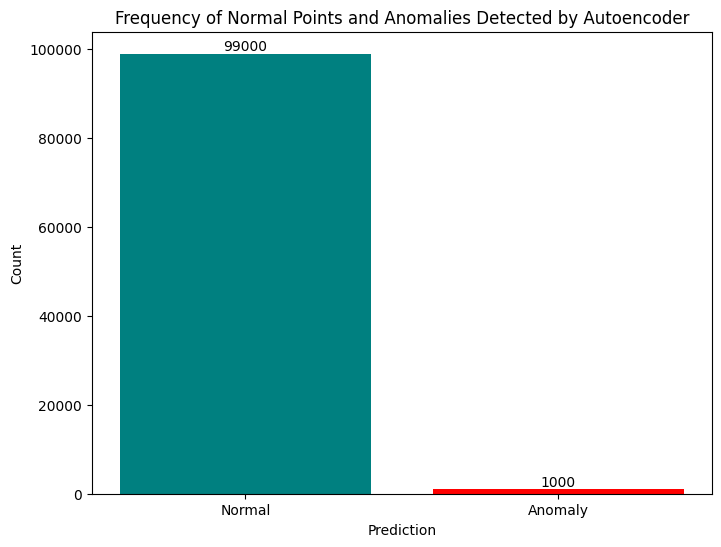

In [26]:
# Plotting the bar plot of outliers of whole dataset
normal_count = len(reconstruction_errors) - np.sum(anomalies)
anomaly_count = np.sum(anomalies)
plt.figure(figsize=(8, 6))
plt.bar(['Normal', 'Anomaly'], [normal_count, anomaly_count], color=['teal', 'r'])
plt.title('Frequency of Normal Points and Anomalies Detected by Autoencoder')
plt.xlabel('Prediction')
plt.ylabel('Count')

# Adding counts over bars
for i, count in enumerate([normal_count, anomaly_count]):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()

### Scatter Plots for different columns

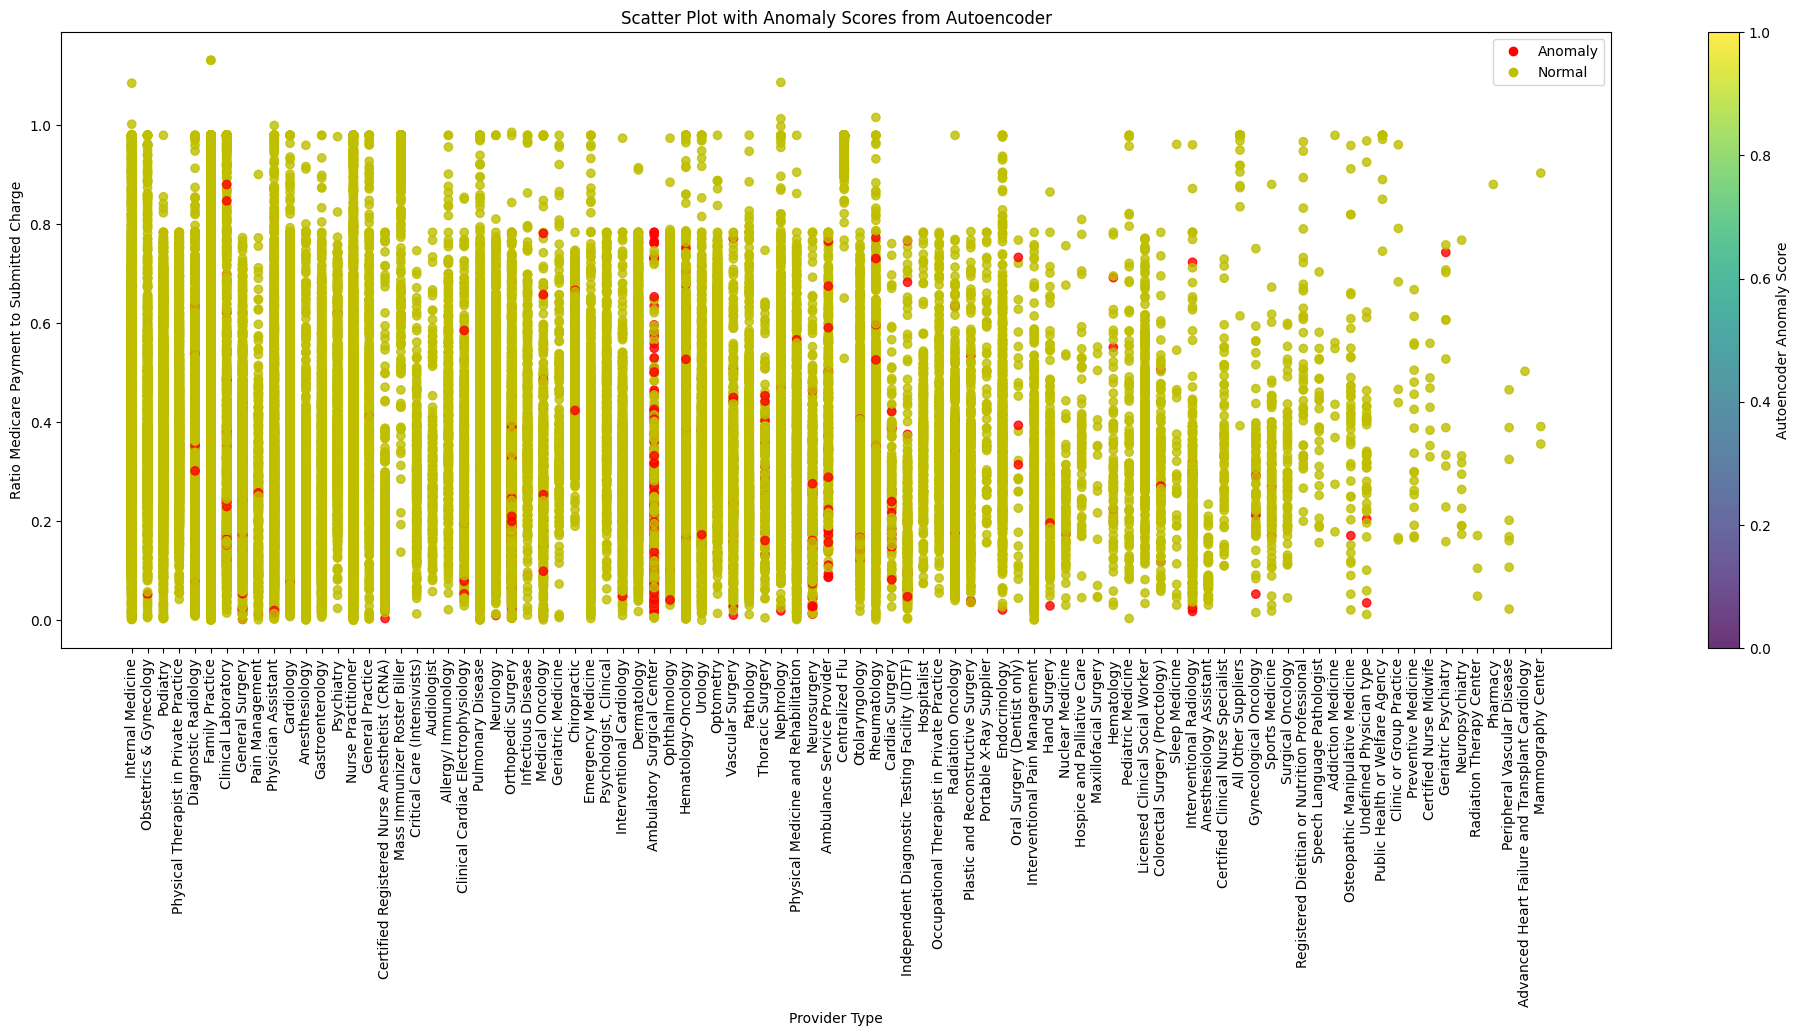

In [27]:
plt.figure(figsize=(25,8))

# Scatter plot with anomaly scores as color
plt.scatter(df['Provider Type'], df['Ratio Medicare Payment to Submitted Charge'], 
            c=np.where(anomalies, 'r', 'y'), alpha=0.8)
plt.colorbar(label='Autoencoder Anomaly Score')
plt.title('Scatter Plot with Anomaly Scores from Autoencoder')
plt.xlabel('Provider Type')
plt.ylabel('Ratio Medicare Payment to Submitted Charge')

legend_labels = {'r': 'Anomaly', 'y': 'Normal'}
handles = [plt.Line2D([0,0],[0,0],marker='o', color=color, linestyle='') for color in legend_labels.keys()]
plt.legend(handles, legend_labels.values(), loc='best')
plt.xticks(rotation=90)

plt.show()


<div class="alert alert-block alert-info">
    <b>Insights:</b> The above scatter plot is between "Provider Type" and "Ratio of Medicare Payment to Submitted Charge". It tells us:
    <ul>
        <li>Most number of anomalies is in <b>"Ambulatory Surgical Center".</b>
        <li>Followed by "Ambulance Service Provider", "Neurosurgery", "Thoracic Surgery", "Cardiac Surgery" and so on.
        <li>There ar many columns having more records but minimal or no anomalies, some of them are: <b>"Internal Medicine", "Podiatry", "Physical Therapist in Private Practice", "Psychiatry", "Nurse Practitioner", "Emergency Medicine", etc.</b>
    </ul>
</div>

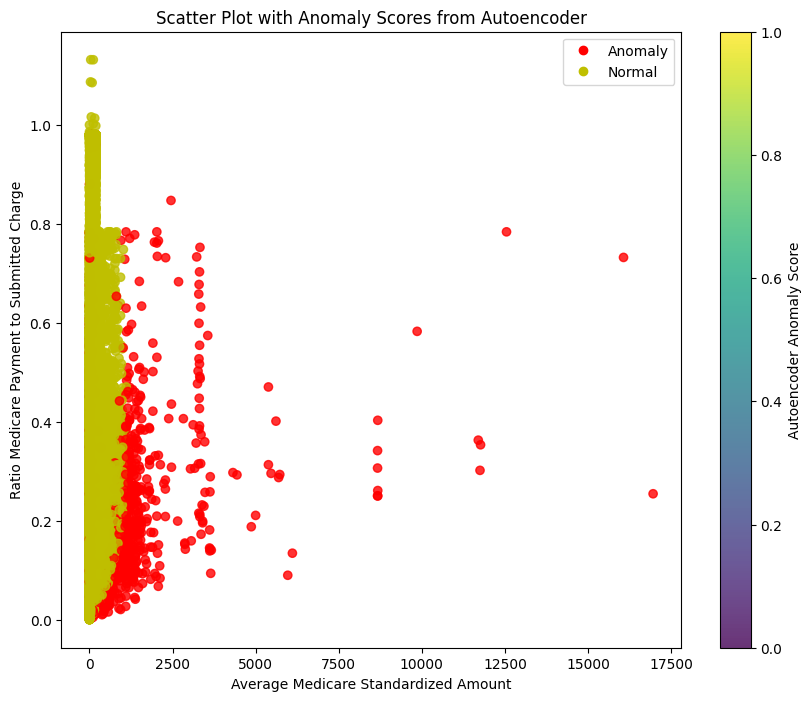

In [28]:
plt.figure(figsize=(10, 8))

# Scatter plot with anomaly scores as color
plt.scatter(df['Average Medicare Standardized Amount'], df['Ratio Medicare Payment to Submitted Charge'], 
            c=np.where(anomalies, 'r', 'y'), alpha=0.8)
plt.colorbar(label='Autoencoder Anomaly Score')
plt.title('Scatter Plot with Anomaly Scores from Autoencoder')
plt.xlabel('Average Medicare Standardized Amount')
plt.ylabel('Ratio Medicare Payment to Submitted Charge')

legend_labels = {'r': 'Anomaly', 'y': 'Normal'}
handles = [plt.Line2D([0,0],[0,0],marker='o', color=color, linestyle='') for color in legend_labels.keys()]
plt.legend(handles, legend_labels.values(), loc='best')

plt.show()


<div class="alert alert-bloxk alert-info">
    <b>Insights:</b> The above scatter plot between "Average Medicare Standardized Amount" and "Ratio Medicare Payment to Submitted Charge" shows that outliers are increasing when standardized amount is increasing, there are more number of outliers when the ratio is below 0.4 and standardized amount is less than 2500.
</div>

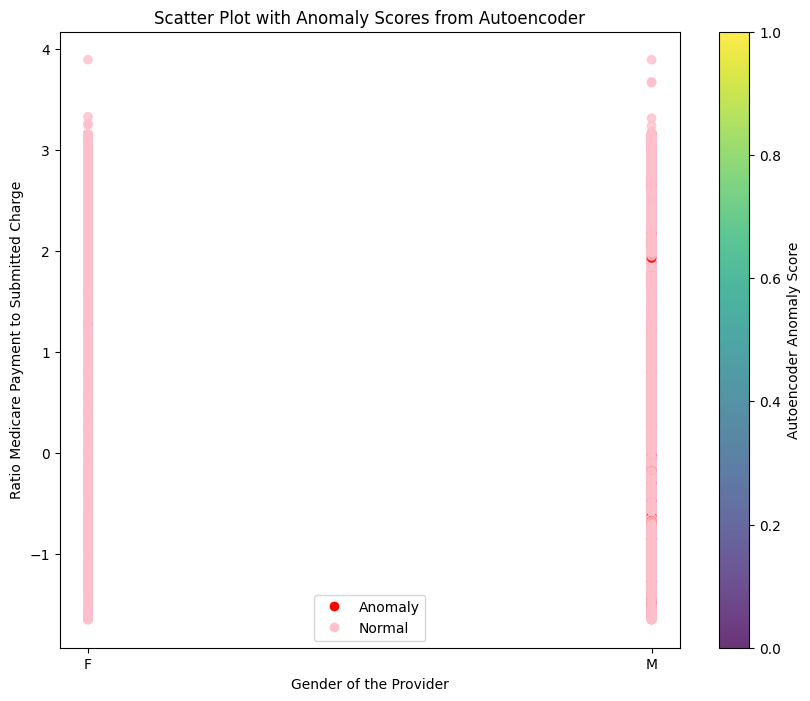

In [29]:
plt.figure(figsize=(10, 8))

# Scatter plot with anomaly scores as color
plt.scatter(df['Gender of the Provider'], df_freq_enc['Ratio Medicare Payment to Submitted Charge'], 
            c=np.where(anomalies, 'r', 'pink'), alpha=0.8)
plt.colorbar(label='Autoencoder Anomaly Score')
plt.title('Scatter Plot with Anomaly Scores from Autoencoder')
plt.xlabel('Gender of the Provider')
plt.ylabel('Ratio Medicare Payment to Submitted Charge')

# Legend for Autoencoder
legend_labels_autoencoder = {'r': 'Anomaly', 'pink': 'Normal'}
handles_autoencoder = [plt.Line2D([0,0],[0,0], marker='o', color=color, linestyle='') 
                       for color in legend_labels_autoencoder.keys()]
plt.legend(handles_autoencoder, legend_labels_autoencoder.values(), loc='best')

plt.show()


<div class="alert alert-bloxk alert-info">
    <b>Insights:</b> This plot between "Gender of the Provider" and "Ratio Medicare Payment to Submitted Charge" shows that the outliers are mostly present in 'Male' column and the 'Female' has very less or minimal number of anomalies.
</div>

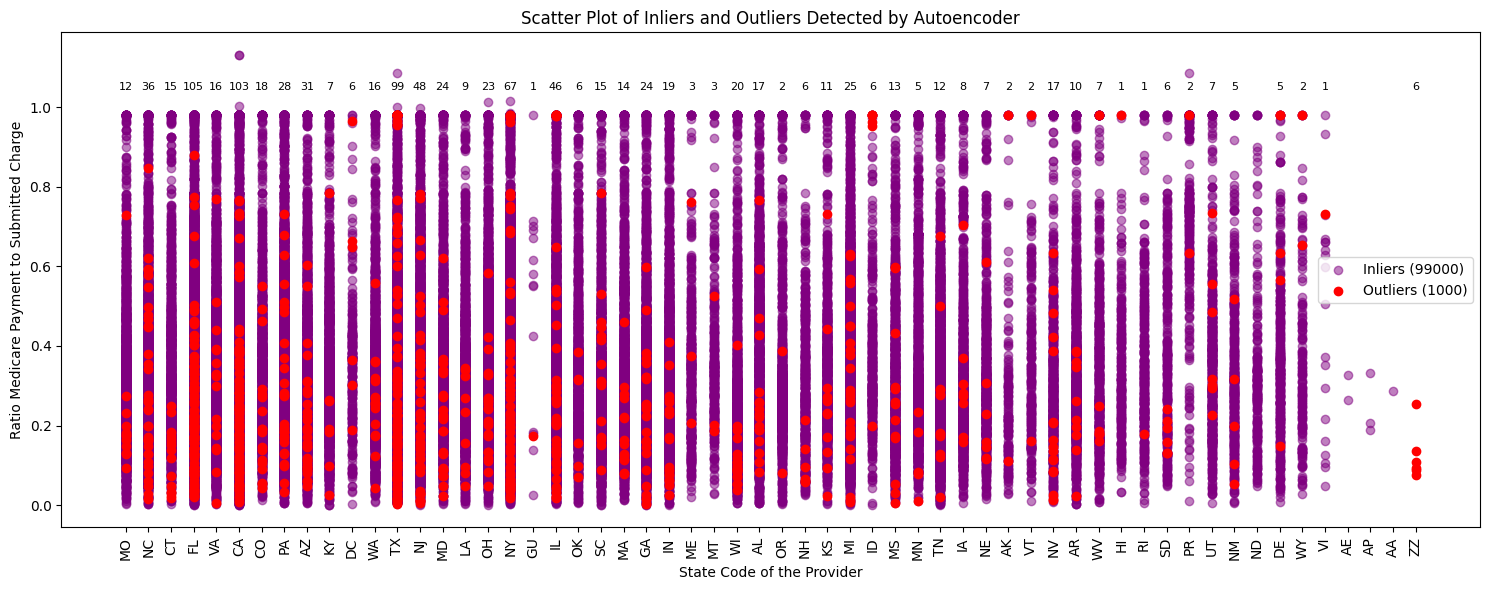

In [30]:
# Assuming 'anomalies_autoencoder' contains boolean values indicating anomalies
inliers_autoencoder = df[~anomalies]
outliers_autoencoder = df[anomalies]

inliers_count = len(inliers_autoencoder)
outliers_count = len(outliers_autoencoder)

# Calculate anomaly counts by state code
anomaly_counts = outliers_autoencoder.groupby('State Code of the Provider').size().reset_index(name='Anomaly Count')

plt.figure(figsize=(15, 6))

# Plotting inliers
plt.scatter(inliers_autoencoder['State Code of the Provider'], inliers_autoencoder['Ratio Medicare Payment to Submitted Charge'],
            label=f'Inliers ({inliers_count})', color='purple', alpha=0.5)

# Plotting outliers
plt.scatter(outliers_autoencoder['State Code of the Provider'], outliers_autoencoder['Ratio Medicare Payment to Submitted Charge'],
            label=f'Outliers ({outliers_count})', color='red')

# Adding labels and title
plt.xlabel("State Code of the Provider")
plt.ylabel("Ratio Medicare Payment to Submitted Charge")
plt.title("Scatter Plot of Inliers and Outliers Detected by Autoencoder")

# Annotate the plot with anomaly counts
for index, row in anomaly_counts.iterrows():
    state_code = row['State Code of the Provider']
    count = row['Anomaly Count']
    plt.text(state_code, 1.05, f'{count}', ha='center', va='center', color='black', fontsize=8)

plt.legend()
plt.xticks(rotation=90)

plt.tight_layout()  # Adjust layout to prevent overlapping elements

plt.show()



<div class="alert alert-block alert-info">
    <b>Insights:</b> The above scatter plot is between "State Code of the Provider" and "Ratio of Medicare Payment to Submitted Charge". It tells us:
    <ul>
        <li>Most number of anomalies is in <b>"FL(105)".</b>
        <li>Followed by <b>"CA(103)", "TX(99)", "NY(66)",</b> and so on.
        <li>There are many State Code Provider having no anomalies, those are: <b>"AE", "AP",and  "AA".</b>
        <li>There are State Code Provider having only 1 anomaly, those are: <b>"GU", "HI", "RI", and "VI".</b>
        <li>There are State Code Provider <b>"ZZ(6)"</b> consists of all anomalies having no normal points.   
    </ul>
</div>